In [2]:
import os, sys, pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
print("Python:", sys.version)
print("Working folder:", os.getcwd())
print("Files here:", os.listdir())
os.environ["OMP_NUM_THREADS"] = "1"

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

Python: 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:37:03) [MSC v.1929 64 bit (AMD64)]
Working folder: c:\Users\LENOVO\OneDrive\Documents\InfotechInternship\project 2\python demo
Files here: ['code.txt', 'Customer_Segmentation.ipynb', 'Mall_Customers.csv', 'Mall_Customers_with_clusters.csv']


In [8]:
DATA_PATH = Path("Mall_Customers.csv")

if not DATA_PATH.exists():
    raise FileNotFoundError(f"Could not find {DATA_PATH.resolve()} — check the filename/location.")

df = pd.read_csv(DATA_PATH)
print("Loaded:", DATA_PATH.name)
df.head()

Loaded: Mall_Customers.csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")


print(df.head())
print("Shape:", df.shape)
display(df.head())# rows, columns
df.info()         # column names & dtypes
df.isna().sum()   # missing values by column
df.describe()     # numeric summary

df.isnull().sum()

df.duplicated().sum()    # count duplicates
df = df.drop_duplicates()

df = df.drop(columns=['CustomerID'])
df.info()

print("Missing values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

print(df.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
Missing values:


In [10]:
print("Shape:", df.shape)
display(df.head())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())
print("\nNumeric summary:")
display(df.describe())

Shape: (200, 4)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40



Data types:
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Missing values:
 Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Duplicates: 0

Numeric summary:


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


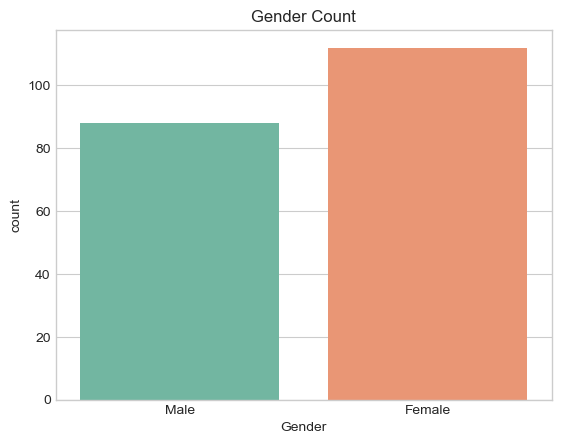

In [12]:
# Gender distribution
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title("Gender Count")
plt.show()

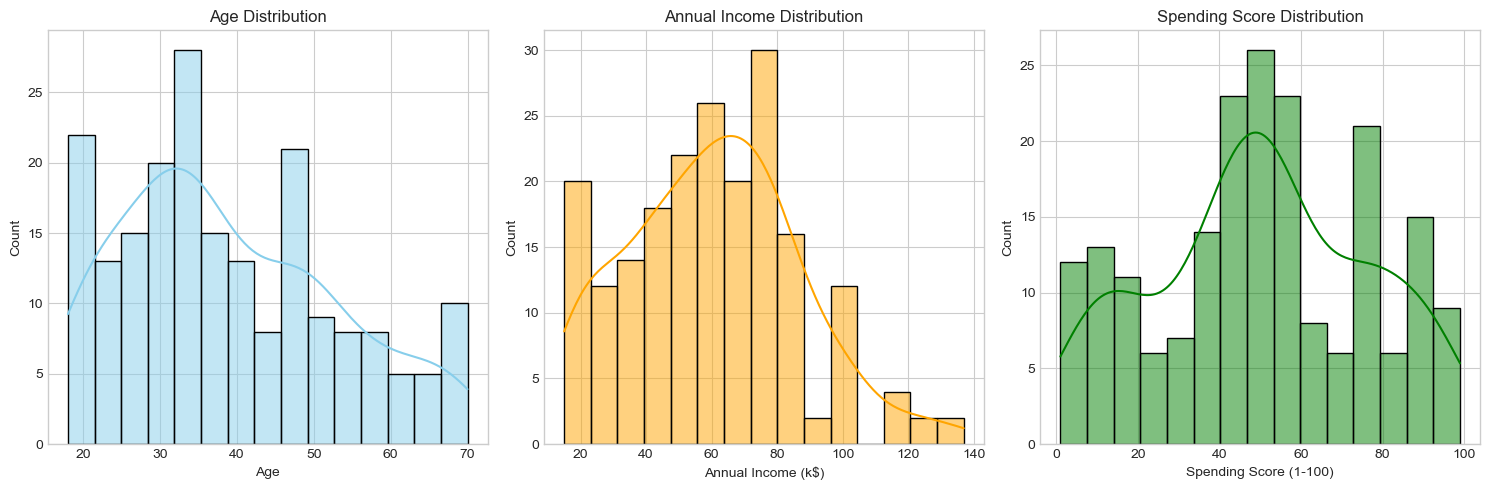

In [13]:
# Age, Income, Spending Score distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df['Age'], bins=15, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Age Distribution")

sns.histplot(df['Annual Income (k$)'], bins=15, kde=True, ax=axes[1], color="orange")
axes[1].set_title("Annual Income Distribution")

sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True, ax=axes[2], color="green")
axes[2].set_title("Spending Score Distribution")

plt.tight_layout()
plt.show()

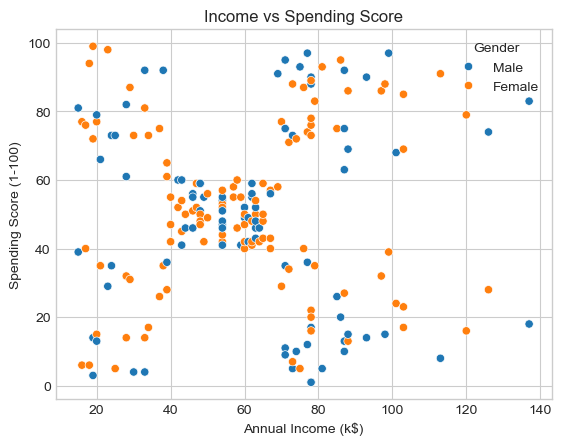

In [14]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender')
plt.title("Income vs Spending Score")
plt.show()

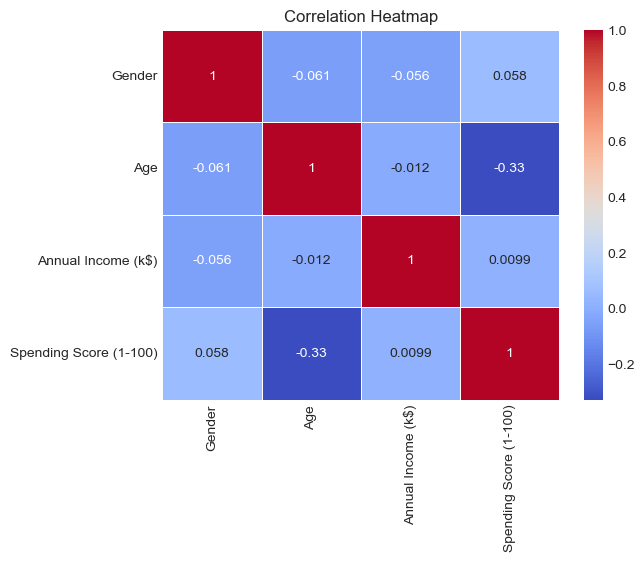

In [15]:
# Convert Gender to numeric (Male=0, Female=1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [16]:
# Drop Gender for now (since it’s categorical)
X = df.drop(columns=['Gender'])


In [17]:
# Week2
# Select relevant features
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(" Data scaled for clustering")
# Apply KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)

# Add new column 'Cluster' to the dataset
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("Clusters assigned to dataset")

 Data scaled for clustering
Clusters assigned to dataset


In [18]:
df.to_csv("Mall_Customers_with_clusters.csv", index=False)


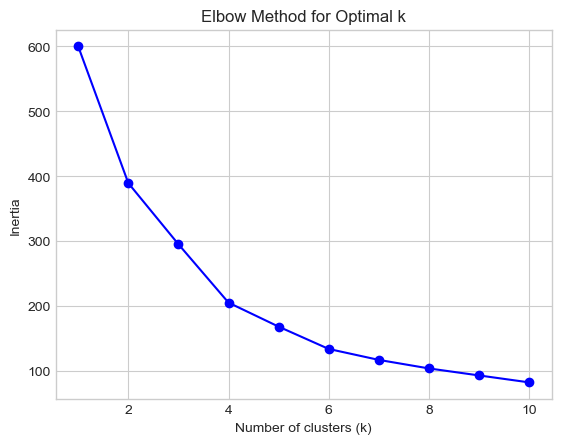

In [19]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    # Plot Elbow Method
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [20]:
#Validate with Silhouette Score
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    print(f"k={k}, silhouette score={score:.3f}")

k=2, silhouette score=0.335
k=3, silhouette score=0.358
k=4, silhouette score=0.404
k=5, silhouette score=0.417
k=6, silhouette score=0.428
k=7, silhouette score=0.417
k=8, silhouette score=0.408
k=9, silhouette score=0.418


In [21]:
#Final K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(" Clustering completed")
df.head()

 Clustering completed


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,1
1,0,21,15,81,1
2,1,20,16,6,0
3,1,23,16,77,1
4,1,31,17,40,1


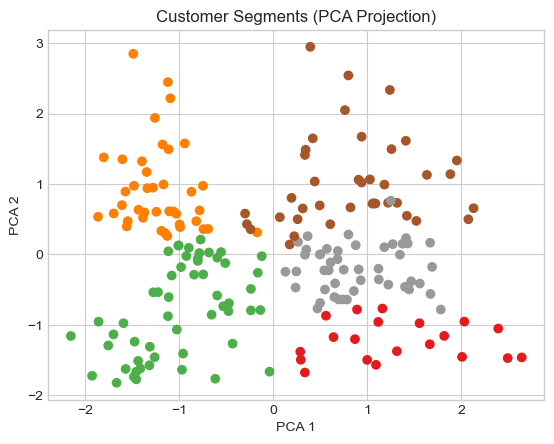

In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='Set1')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Customer Segments (PCA Projection)")
plt.show()

In [23]:
#week3
#Profile Each Cluster
df['Cluster'] = kmeans.labels_
cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)
df['Cluster'].value_counts()

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.600000  46.250000           26.750000               18.350000
1        0.592593  25.185185           41.092593               62.240741
2        0.550000  32.875000           86.100000               81.525000
3        0.487179  39.871795           86.102564               19.358974
4        0.574468  55.638298           54.382979               48.851064


Cluster
1    54
4    47
2    40
3    39
0    20
Name: count, dtype: int64

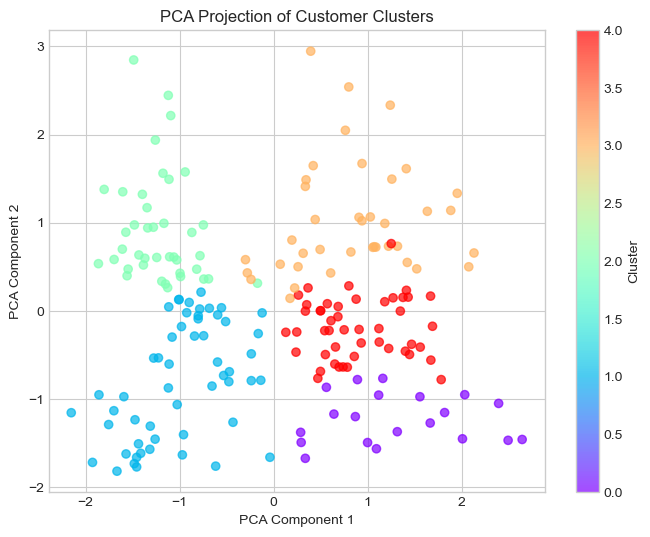

In [24]:
#week4
#PCA (2D Projection of Clusters)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, cmap='rainbow', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection of Customer Clusters")
plt.colorbar(label="Cluster")
plt.show()


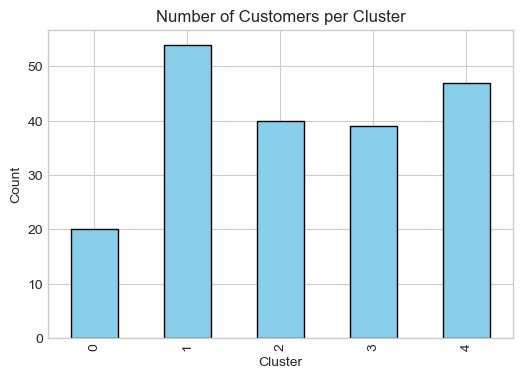

In [25]:
#Cluster Size Bar Chart
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = labels
df_clusters = df.copy()
cluster_counts = df_clusters['Cluster'].value_counts().sort_index()

plt.figure(figsize=(6,4))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Customers per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

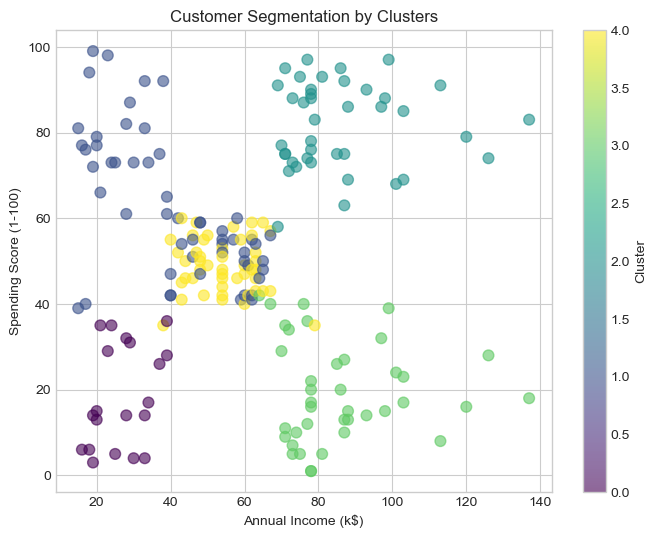

In [26]:
#Cluster Scatter Plot (Age vs. Income, colored by cluster)
plt.figure(figsize=(8,6))
plt.scatter(df_clusters['Annual Income (k$)'], df_clusters['Spending Score (1-100)'],
            c=df_clusters['Cluster'], cmap='viridis', alpha=0.6, s=60)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation by Clusters")
plt.colorbar(label="Cluster")
plt.show()